### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Define global settings

In [2]:
pd.options.display.float_format = '{:.6f}'.format

### Reading the training and testing dataset files

In [3]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')


### Features to keep

In [4]:
kbest_15 = ['longitude', 'sq_feet', 'lease_term_6 months', 'type_Basement', 'type_House',
 'type_Room For Rent', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Ontario',
 'province_Saskatchewan', 'city_Toronto', 'city_Edmonton' ,'city_Winnipeg',
 'city_Regina', 'city_West Vancouver']

kbest_20 = ['longitude','beds', 'sq_feet', 'lease_term_6 months',
 'lease_term_Short Term', 'type_Basement', 'type_House', 'type_Room For Rent',
 'province_Manitoba', 'province_Newfoundland and Labrador',
 'province_Ontario', 'province_Saskatchewan', 'city_Calgary', 'city_Toronto',
 'city_Edmonton', 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver',
 'city_Regina', 'city_West Vancouver']

kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']

corBest_30 = ['baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria']

corBest_15 = corBest_30[0:15]
corBest_20 = corBest_30[0:20]


feat2keep = corBest_30

### Keep only selected features from dataset

In [5]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Split dataset into training and testing set

In [6]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Part 1: Find the optimal polynomial degree
---
Conclusion :


## Part 2 : Building the model with the best polynomial degree
---

### Create Polynomial Features

In [7]:
pol_degree = 2

In [8]:
# Create an instance of PolynomialFeatures
converter = PolynomialFeatures(degree=pol_degree, include_bias=False)

# Fit converter to X_train andX_testing features + transform features
X_train_feat = converter.fit_transform(X_train)
X_test_feat = converter.fit_transform(X_test)
    

### Data scaling

In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_feat_scaled = scaler.fit_transform(X_train_feat)

# Transform only on test data
X_test_feat_scaled = scaler.transform(X_test_feat)

### Create a Polynomial Regression Model

In [10]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_feat_scaled, y_train)

LinearRegression()

### Use model on testing dataset

In [11]:
# Get prediction for testing dataset
y_pred = model.predict(X_test_feat_scaled)

### Plot the residuals

Text(0.5, 1.0, 'QQ plot')

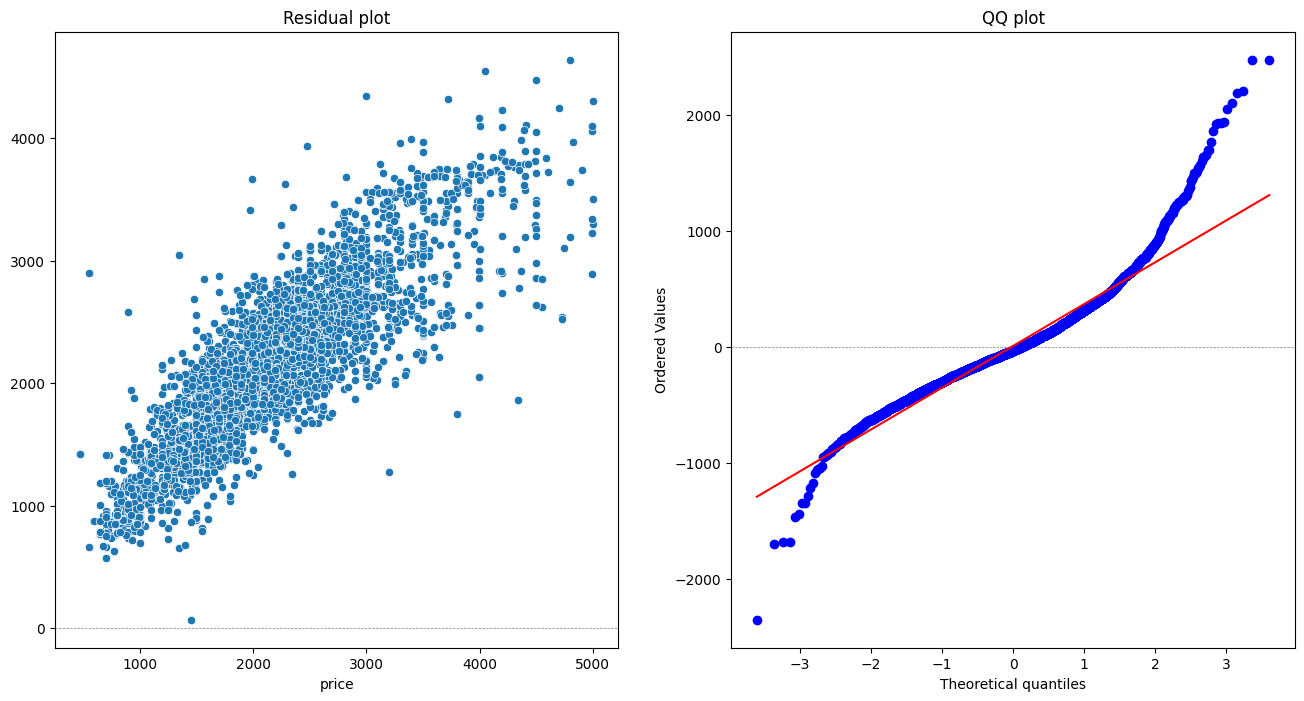

In [12]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

### Compute error scores

In [13]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.2f}\n\
The R2 scores = {r2:.2f}')

The Mean Absolute Error = 266
The Mean Square Error = 138808
The Root Mean Square Error = 372.57
The R2 scores = 0.74


In [14]:
sum((y_test-y_pred)**2)/len(y_test)

138807.85391827358

In [15]:
mean_squared_error(y_test, y_pred)

138807.85391827358


| Regression Method   | Predictors  | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ----------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | SelectKBest (15) | 407                | 309293             | 556                   | 0.41           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 0.62           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 0.57           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 0.63           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 0.65           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 0.65           |
| Polynomial          | SelectKBest (15) | 319                | 197348             | 444                   | 0.63           |
|                     | Highest corr (15)| 278                | 150742             | 388                   | 0.71           |
|                     | SelectKBest (20) | 302                | 176505             | 420                   | 0.67           |
|                     | Highest corr (20)| 274                | 147937             | 385                   | 0.72           |
|                     | SelectKBest (30) | 263                | 134968             | 367                   | 0.74           |
|                     | Highest corr (30)| 266                | 138808             | 373                   | 0.74           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.
